In [21]:
!pip install fastai
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

In [22]:
from pathlib import Path
x = '/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/train/'
path = Path(x)
contents = path.ls()
print(contents)

[Path('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/train/PNEUMONIA'), Path('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/train/NORMAL'), Path('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/train/tmp007j3xhr'), Path('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/train/tmpryjmb83t'), Path('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/train/.DS_Store')]


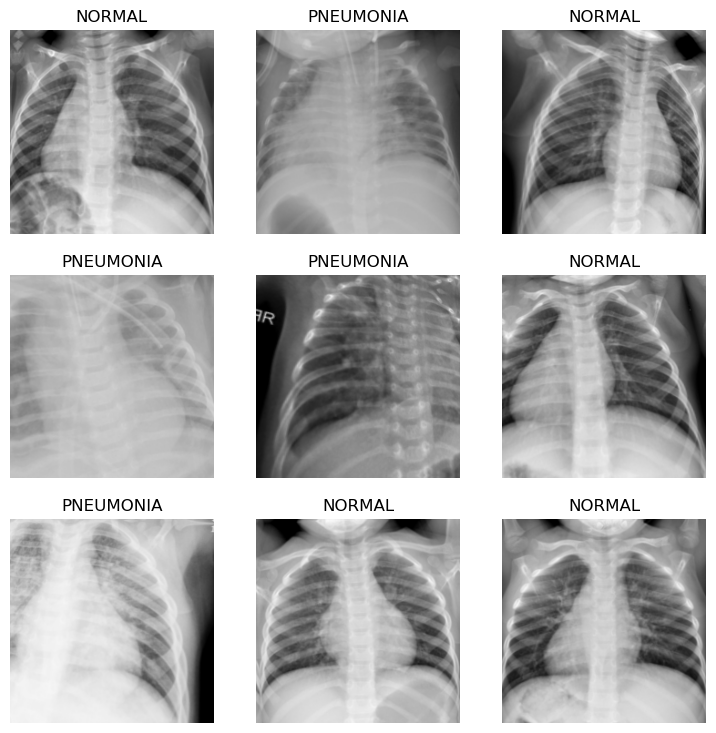

In [23]:
from fastai.vision.all import *
import numpy as np
from pathlib import Path
np.random.seed(40)
item_tfms = Resize(224)  
batch_tfms = [*aug_transforms(), Normalize.from_stats(*imagenet_stats)]  
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  
    get_items=get_image_files,  
    get_y=parent_label,  
    item_tfms=item_tfms,  
    batch_tfms=batch_tfms,  
    splitter=RandomSplitter(valid_pct=0.2, seed=40)  
)
dls = dblock.dataloaders(path, num_workers=4)
dls.show_batch()

In [24]:
learn = cnn_learner(dls, models.resnet50, metrics=[accuracy], model_dir = Path('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/train/'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/harsha/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:28<00:00, 3.04MB/s]


CPU Memory: 38.4% used, GPU Memory: 0.00 GB used


epoch,train_loss,valid_loss,accuracy,time
0,2.400732,21.395748,0.500000,12:20
1,1.519930,8.514072,0.500000,12:14
2,0.198986,1.882165,0.750000,12:08
3,0.123397,0.522734,0.812500,12:09


CPU Memory: 37.1% used, GPU Memory: 0.00 GB used
CPU Memory: 37.1% used, GPU Memory: 0.00 GB used


epoch,train_loss,valid_loss,accuracy,time
0,0.070835,0.391098,0.875000,12:11
1,0.319968,0.180201,0.875000,12:13
2,1.595656,1.407556,0.750000,12:15
3,1.031396,0.000139,1.000000,12:13
4,0.918305,0.494368,0.937500,12:14
5,1.441830,0.082635,0.937500,13:15
6,4.206492,0.000000,1.000000,20:01
7,1.255847,0.787985,0.937500,15:36
8,1.819928,0.000000,1.000000,18:37
9,0.946043,607.482117,0.500000,16:12


CPU Memory: 43.1% used, GPU Memory: 0.00 GB used


AttributeError: 'Sequential' object has no attribute 'plot'

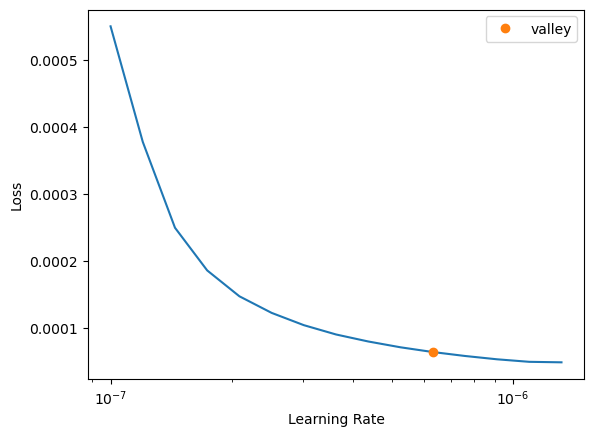

In [29]:
import torch
from fastai.vision.all import *
import psutil
from pathlib import Path

# Monitor system resources
def log_system_resources():
    mem = psutil.virtual_memory()
    gpu_mem = torch.cuda.memory_allocated() if torch.cuda.is_available() else 0
    print(f"CPU Memory: {mem.percent}% used, GPU Memory: {gpu_mem / 1e9:.2f} GB used")

# Paths to your data
train_path = Path('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/train/')
valid_path = Path('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/val/')

# Load data with a reduced batch size
batch_size = 16
data = ImageDataLoaders.from_folder(
    train_path.parent, train='train', valid='val', 
    bs=batch_size, item_tfms=Resize(224)
)

# Create the learner
learn = cnn_learner(data, resnet34, metrics=accuracy)

# Initial training
lr1 = 1e-3
lr2 = 1e-1
log_system_resources()
learn.fit_one_cycle(4, slice(lr1, lr2))
log_system_resources()

# Extended training with a single learning rate
lr = 1e-1
log_system_resources()
learn.fit_one_cycle(20, slice(lr))
log_system_resources()

# Unfreeze and find optimal learning rate
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

# Fine-tuning with lower learning rates
log_system_resources()
learn.fit_one_cycle(10, slice(1e-4, 1e-3))
log_system_resources()

# Plot the loss
learn.recorder.plot_losses()

# Save the model
learn.save('final_model')


In [49]:
from fastai.vision.all import *

# Load the model
learn = load_learner('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/model.pkl')

# Making a prediction
pred = learn.predict('/home/harsha/Desktop/Pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person14_virus_44.jpeg')
print(pred)

('PNEUMONIA', tensor(1), tensor([1.1246e-12, 1.0000e+00]))
